In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

## Pre-Task: Describe the goals of your study

## Part 1: Aquire the Data

In [2]:
#!psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic
#password: gastudents

#### 1. Connect to the remote database

In [3]:
import pandas as pd
from pandas.io import sql
import sqlite3
conn = sqlite3.connect('thetitanic.db')

In [4]:
pd.read_csv('thetitanic.csv').to_sql('thetitanic', con=conn, if_exists='replace', index=False)

In [5]:
sql.read_sql('SELECT * FROM thetitanic LIMIT 3', con=conn)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S


In [6]:
titanic = pd.read_csv('thetitanic.csv')

In [7]:
titanic = titanic.fillna(titanic.mean(), inplace = True)

In [8]:
titanic.isnull().sum()

index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2. Query the database and aggregate the data

In [9]:
titanic.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

This data has information on the passengers of the Titanic, including age, sex, siblings & spouses, parents & children, fare price, embarking city, and more. I will use relevant items in the data to predict passengers' likelihood of survival. 

#### 2. Visualize the Data

In [10]:
titanic.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
titanic['Age'].std()

13.002015226002884

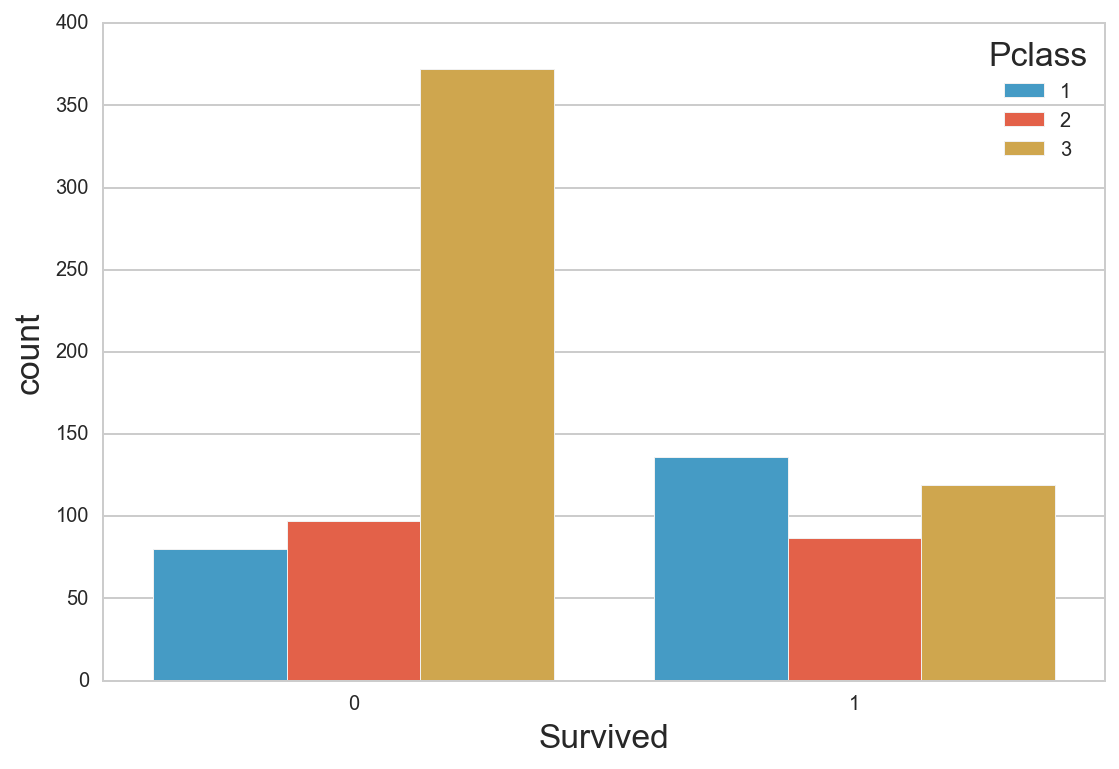

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic)

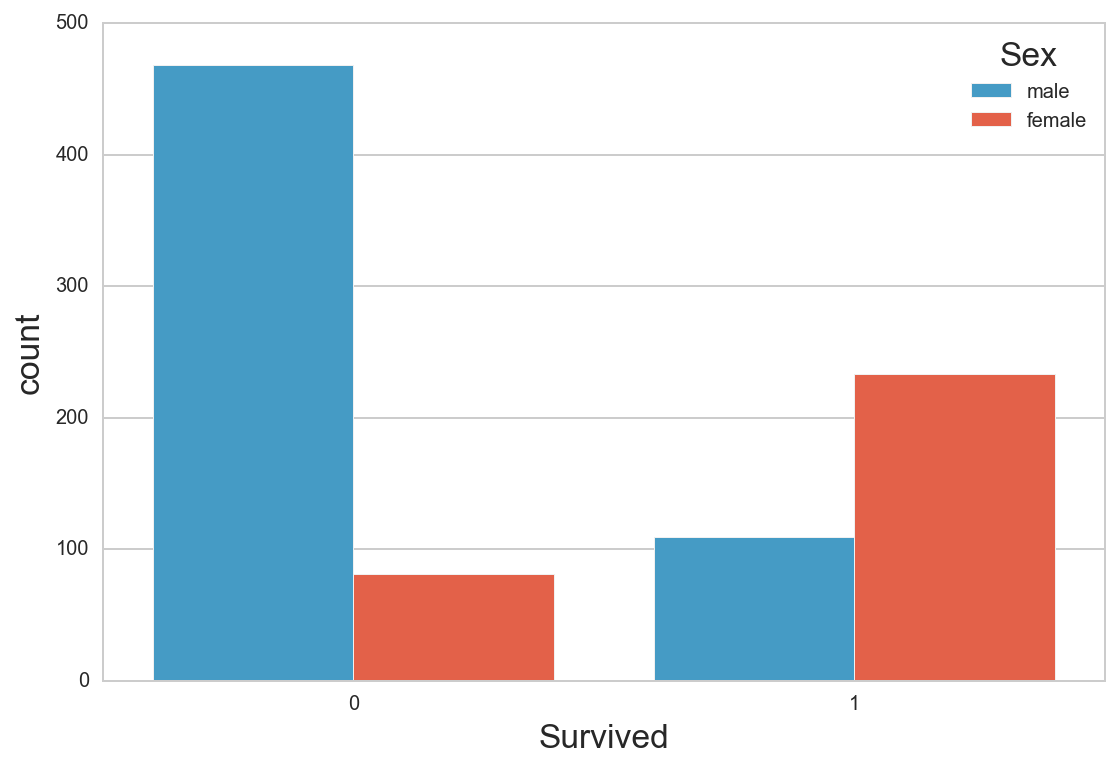

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic)

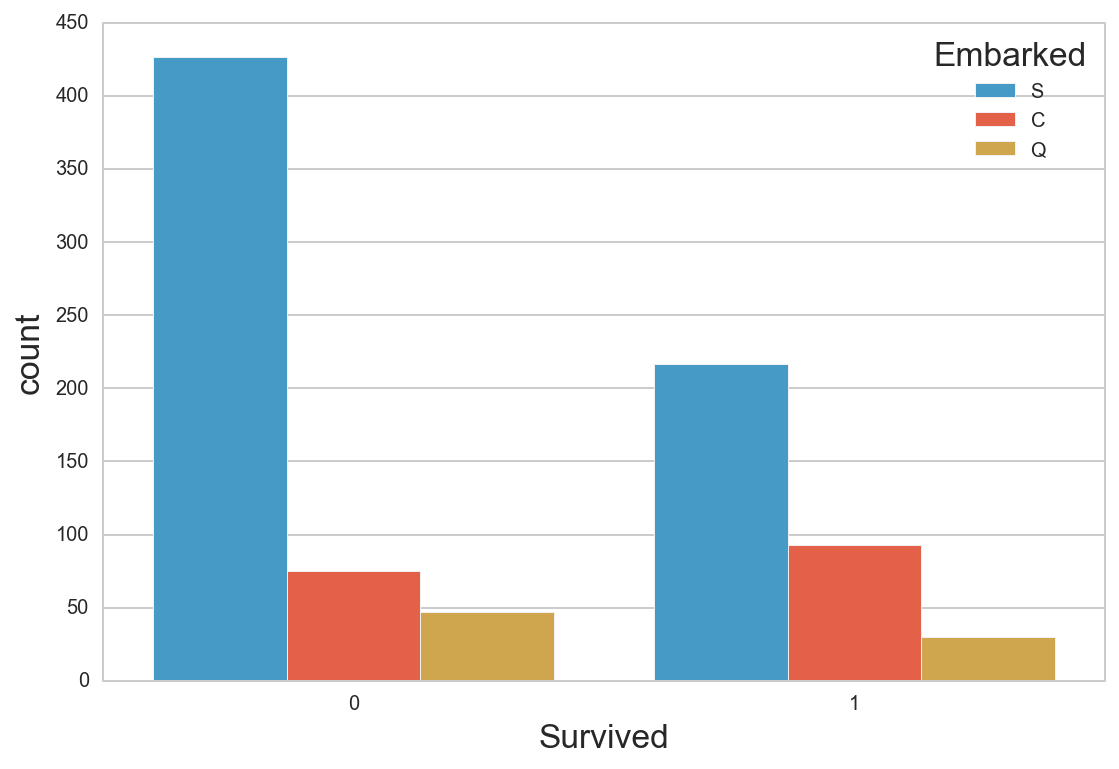

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Embarked', data=titanic)

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex*  use sklearn pipline

In [12]:
titanic[['Male', 'Female']] = pd.get_dummies(titanic['Sex'])

In [13]:
titanic

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1.0,0.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0.0,1.0
5,5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0.0,1.0
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0.0,1.0
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0.0,1.0
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,1.0,0.0
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1.0,0.0


In [19]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# # Split 70/30 into initial data and new points to classify
# ttrain = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
# ttest = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

In [ ]:
# from sklearn import svm
# from sklearn.datasets import samples_generator
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# from sklearn.pipeline import Pipeline

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit_transform(sexdummy)
# titanic['Sex'] = le.fit_transform(sexdummy)

## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [15]:
columns = ['Male',
           'Female',
           'Age',
           'Pclass',
           'SibSp',
           'Parch',
           'Fare']

y = titanic['Survived']

In [16]:
#Baseline
y.value_counts() / len(y)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

In [17]:
from sklearn.preprocessing import LabelEncoder
X = titanic[columns].values

le = LabelEncoder()
y = le.fit_transform(y)


In [18]:
X.shape

(891, 7)

#### 3. Conduct the logistic regression

In [20]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

imp = Imputer(missing_values=np.nan,strategy="mean",axis=0)

pipe_lr = Pipeline([('imputer', imp), ('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Scaled/Standardized Improved Test Accuracy: %.4f' % pipe_lr.score(X_test, y_test))

Scaled/Standardized Improved Test Accuracy: 0.8169


#### 4. Examine the coefficients

In [21]:
pipe_lr.steps[-1][1].coef_, columns

(array([[ 0.61460664, -0.61460664, -0.38405755, -0.71610049, -0.36159455,
         -0.11202797,  0.20194244]]),
 ['Male', 'Female', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])

#### 10. Cross validate on 10 folds

In [22]:
from sklearn.linear_model import LogisticRegression
# l2 - NON-SPARSE REGULARIZATION INVOKED - INSTANTIATE LOGISTIC REGRESSION WITH C=1 PARAMETER
lr = LogisticRegression(penalty = 'l2', C=1)
lr.fit(X_train, y_train)
print('INITIAL MODEL ACCURACY (NO Cross Validation: ', lr.score(X_test, y_test))

# WITH 5-FOLD CROSS VALIDATION (WE ARE TOLD TO USE CROSS_VAL_SCORE)
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

# CV VIA REUSED INSTANTIATED LR MODEL ABOVE 
scores = cross_validation.cross_val_score(lr, X_test, y_test,scoring='accuracy', cv=10)
print('CV 10-FOLD Scores: ', scores)
print('CV 10-FOLD Mean Accuracy', scores.mean() )
print('CV 10-FOLD Standard Deviation of Accuracy', scores.std() )

('INITIAL MODEL ACCURACY (NO Cross Validation: ', 0.81016949152542372)
('CV 10-FOLD Scores: ', array([ 0.86666667,  0.83333333,  0.83333333,  0.76666667,  0.7       ,
        0.82758621,  0.72413793,  0.86206897,  0.86206897,  0.79310345]))
('CV 10-FOLD Mean Accuracy', 0.80689655172413788)
('CV 10-FOLD Standard Deviation of Accuracy', 0.056187971333777162)


#### 11. Check the Classification Report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       175
          1       0.82      0.71      0.76       120

avg / total       0.82      0.82      0.81       295



#### 12. What do the classification metrics tell us?

- Precision is true positives over total positives. This measures whether we found a negative as a positive. It's about 83% accurate. 

- Recall is the true positives over true positives and false negatives. This looks at whether we missed any positives and labeled them negative. It's about 83% accurate. 

- The f1score takes into account the precision and recall and wants to be as close to 1 as possible. 1 is the best, 0 is the worst. Our f1-score is .83.

- Support is the total number of occurances of each.

#### 13. Check the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

predictions = pipe_lr.predict(X_test)
confusion_matrix(y_test, predictions)

array([[156,  19],
       [ 35,  85]])

#### 14. What does the Confusion Matrix tell us? 

According to the Confusion Matrix: 
 - We predicted 156 people were dead who were actually dead.
 - We predicted 19 people alive who were actually dead.
 - We predicted 35 people alive who were actually dead.
 - We predicted 85 people alive who were actually alive. 


#### 15. Plot the ROC curve

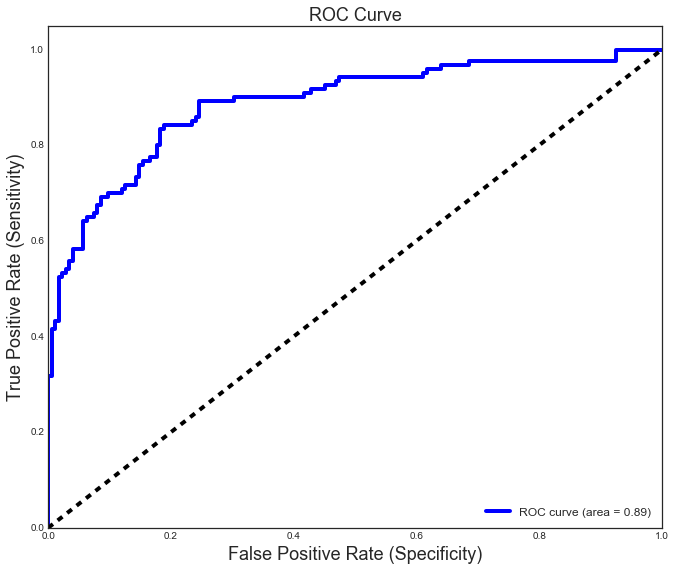

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = lr.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)', fontsize=18)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=18)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### 16. What does the ROC curve tell us?

The closer the ROC curve is to the upper left border, the more accurate the test is. The closer to 45 degrees, the less accurate. This ROC curve is relatively well made, telling us the test is relatively accurate. 

## Part 5: Gridsearch

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([ ('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1)) ])
pipe_lr.fit(X, y)
print('Scaled/Standardized Improved Test Accuracy: %.4f' % pipe_lr.score(X_test, y_test))

Scaled/Standardized Improved Test Accuracy: 0.8339


#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [28]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']
}

In [29]:
from sklearn.grid_search import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)

gs = gs.fit(X, y)
print('Grid Search Best Score: %.4f' % gs.best_score_)
print('Grid Search Best Parameter for C: ')
print gs.best_params_
print gs.best_score_

print gs.predict_proba(X_test)

Grid Search Best Score: 0.7890
Grid Search Best Parameter for C: 
{'clf__C': 10.0}
0.789001122334
[[ 0.93404235  0.06595765]
 [ 0.76339196  0.23660804]
 [ 0.86120413  0.13879587]
 [ 0.07363169  0.92636831]
 [ 0.30308519  0.69691481]
 [ 0.04455965  0.95544035]
 [ 0.36570133  0.63429867]
 [ 0.91197325  0.08802675]
 [ 0.25098001  0.74901999]
 [ 0.04887331  0.95112669]
 [ 0.63524859  0.36475141]
 [ 0.94135002  0.05864998]
 [ 0.63655278  0.36344722]
 [ 0.90233819  0.09766181]
 [ 0.79613162  0.20386838]
 [ 0.03780727  0.96219273]
 [ 0.68014456  0.31985544]
 [ 0.36564878  0.63435122]
 [ 0.73218871  0.26781129]
 [ 0.64660178  0.35339822]
 [ 0.87909315  0.12090685]
 [ 0.54039707  0.45960293]
 [ 0.34867132  0.65132868]
 [ 0.86075903  0.13924097]
 [ 0.8994157   0.1005843 ]
 [ 0.93375082  0.06624918]
 [ 0.59779397  0.40220603]
 [ 0.76209783  0.23790217]
 [ 0.91744266  0.08255734]
 [ 0.37766601  0.62233399]
 [ 0.85641106  0.14358894]
 [ 0.29823792  0.70176208]
 [ 0.49492594  0.50507406]
 [ 0.365834

#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

The best score is .789 (or 78.9%) which is exactly 1% below the logistic regression score of 79.9%.

#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

In Ridge Regression you aren't able to zero out coefficients so you either use all or none at all. In Lasso, on the other hand, you can perform shrinkage on perameters and variable selection. 

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

If you have a large number of variables, Lasso may be more useful because you can tune the variables to see which are most important to your model. 

#### 5. Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

The smaller the value of C, the more constrained the model is. Conversely, a larger C value gives more freedom. L1 with a lower coefficient will be quite sparse. L2, on the other hand will have greater results, but a larger number of false positives. As the coefficients increase, so do the responses. The L1 will always err on the side of accuracy, where the L2 lets more responses through, regardless of accuracy. 

#### 6. You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

In [30]:
Y_proba= lr.predict_proba(X_test)

In [31]:
Y_proba

def make_class(probas, threshold):
    output = []
    for i in probas:
        if i[0] > threshold:
            output.append(0)
        else:
            output.append(1)
    return output

y_90 = make_class(Y_proba, .9)

In [32]:
confusion_matrix(y_test, y_90)

array([[ 18, 157],
       [  3, 117]])

According to the Confusion Matrix: 
 - We predicted 18 people were dead who were actually dead.
 - We predicted 157 people alive who were actually dead.
 - We predicted 3 people alive who were actually dead.
 - We predicted 117 people alive who were actually alive. 

With 90% confidence, we were able to minimize the false positive number to just 3, and increase our true positieves to 117. By doing this, however, our false negatives increased to 157 from 19.

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

In [33]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors':range(5,20),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, verbose=1)
knn_gs.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [34]:
knn_best = knn_gs.best_estimator_
print knn_gs.best_params_
print knn_gs.best_score_

{'n_neighbors': 7, 'weights': 'uniform'}
0.714765100671


In [35]:
# from sklearn.svm import SVC
# #  'kernel':['linear','rbf']
# # 'C':np.logspace(1e-1, 1e1, 3)

# svc_params = {
#     'C':np.logspace(1e-1, 1e1, 3),
#     'kernel':['linear']
# }

# svc_gs = GridSearchCV(SVC(), svc_params, cv=2, verbose=1)
# svc_gs.fit(X, y)

In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

def accuracy_crossvalidator(X, Y, knn, cv_indices):
    
    scores = []
    
    for train_i, test_i in cv_indices:
        
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        Y_train = Y[train_i]
        Y_test = Y[test_i]

        knn.fit(X_train, Y_train)
        
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

In [37]:

cv_indices = StratifiedKFold(y, n_folds=5)

for i in range(3,12, 2):
    
    mean_knn_n5 = KNeighborsClassifier(n_neighbors=i,
                                       weights='uniform')

    print str(i) + " Neighbors \n", accuracy_crossvalidator(X, y, mean_knn_n5, cv_indices)

3 Neighbors 
('Fold accuracy:', 0.65921787709497204)
('Fold accuracy:', 0.70949720670391059)
('Fold accuracy:', 0.7303370786516854)
('Fold accuracy:', 0.7359550561797753)
('Fold accuracy:', 0.69491525423728817)
('Mean CV accuracy:', 0.7059844945735263)
None
5 Neighbors 
('Fold accuracy:', 0.66480446927374304)
('Fold accuracy:', 0.69273743016759781)
('Fold accuracy:', 0.7415730337078652)
('Fold accuracy:', 0.7191011235955056)
('Fold accuracy:', 0.75141242937853103)
('Mean CV accuracy:', 0.7139256972246486)
None
7 Neighbors 
('Fold accuracy:', 0.65921787709497204)
('Fold accuracy:', 0.69273743016759781)
('Fold accuracy:', 0.702247191011236)
('Fold accuracy:', 0.7471910112359551)
('Fold accuracy:', 0.75706214689265539)
('Mean CV accuracy:', 0.71169113128048322)
None
9 Neighbors 
('Fold accuracy:', 0.64804469273743015)
('Fold accuracy:', 0.67597765363128492)
('Fold accuracy:', 0.7247191011235955)
('Fold accuracy:', 0.7471910112359551)
('Fold accuracy:', 0.7231638418079096)
('Mean CV accura

#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### Why?

The mean Cross Validation accuracy is relatively comparable across all neighbors. According to this, five will be the best number of neighbors to use. In general, kNN is not the best model to use in the case of the Titanic, as even the best is almost 10% below the Logistic Regression model.  

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

If you have very few low bias/high variance classifiers, logistic regression would be the preferred model because using kNN could result in overfitting. 

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

In [39]:
knn_predict = neigh.predict(X_test)
confusion_matrix(y_test, knn_predict)

array([[138,  37],
       [ 49,  71]])

According to the Confusion Matrix: 
 - We predicted 138 people were dead who were actually dead.
 - We predicted 37 people alive who were actually dead.
 - We predicted 49 people alive who were actually dead.
 - We predicted 71 people alive who were actually alive. 

The kNN confusion matrix is less accurate than the logistic regression model. We essentially want the top left and bottom right numbers to be as large as possible, and the top right and bottom left to be as close to zero as possible. In this instance, with 37 and 49, we incorrectly guessed 32 more times than in the Logistic Regression model. 

#### 7. Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

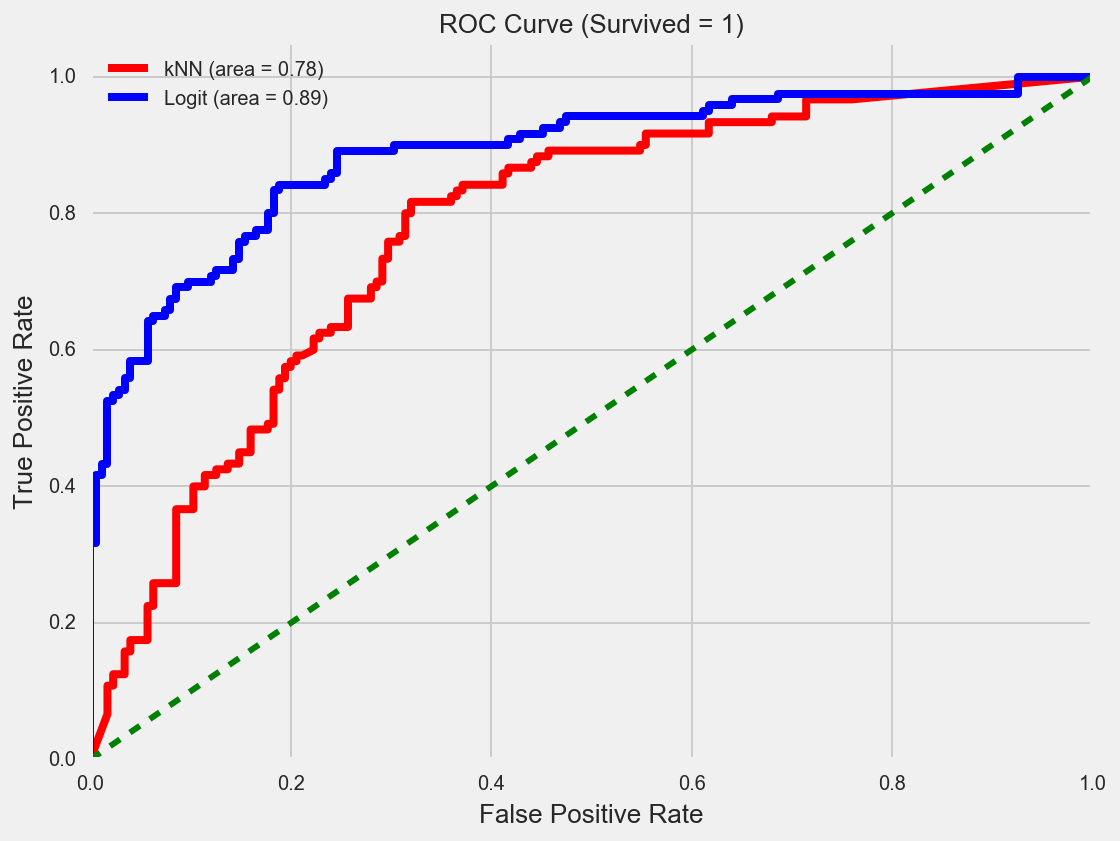

In [40]:
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

y_pred_knn = neigh.predict_proba(X_test)[:,1]
y_pred_logreg = lr.decision_function(X_test)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn) 
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_logreg) 

AUC_knn = auc(fpr_knn, tpr_knn)
AUC_log = auc(fpr_log, tpr_log)

# Plot of a ROC curve for class 1 (survived)

plt.figure(figsize=[8,6])
plt.plot(fpr_knn, tpr_knn, linewidth=4, color ='r',
         label='kNN (area = %0.2f)' % AUC_knn)
plt.plot(fpr_log, tpr_log, linewidth=4, color ='b',
         label='Logit (area = %0.2f)' % AUC_log)
plt.plot([0, 1], [0, 1], 'g--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curve (Survived = 1)', fontsize=13)
plt.legend(loc="best")

plt.show()

## Part 7: Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

In [44]:
gs = gs.fit(X_train, y_train)
print('Grid Search Best Score: %.4f' % gs.best_score_)
print('Grid Search Best Parameter for C: ', gs.best_params_)

print gs.predict_proba(X_test)

Grid Search Best Score: 0.7936
('Grid Search Best Parameter for C: ', {'clf__C': 0.1})
[[ 0.89760391  0.10239609]
 [ 0.75315301  0.24684699]
 [ 0.8329212   0.1670788 ]
 [ 0.13608076  0.86391924]
 [ 0.32869178  0.67130822]
 [ 0.08107831  0.91892169]
 [ 0.36205681  0.63794319]
 [ 0.87528697  0.12471303]
 [ 0.29080856  0.70919144]
 [ 0.10634706  0.89365294]
 [ 0.64136983  0.35863017]
 [ 0.89801523  0.10198477]
 [ 0.55069961  0.44930039]
 [ 0.8637258   0.1362742 ]
 [ 0.77274954  0.22725046]
 [ 0.08482148  0.91517852]
 [ 0.66866908  0.33133092]
 [ 0.36198202  0.63801798]
 [ 0.73309388  0.26690612]
 [ 0.64198328  0.35801672]
 [ 0.84572964  0.15427036]
 [ 0.59378262  0.40621738]
 [ 0.35855744  0.64144256]
 [ 0.83218011  0.16781989]
 [ 0.85932556  0.14067444]
 [ 0.9050882   0.0949118 ]
 [ 0.6264899   0.3735101 ]
 [ 0.75124754  0.24875246]
 [ 0.89213472  0.10786528]
 [ 0.36911609  0.63088391]
 [ 0.82961029  0.17038971]
 [ 0.32101525  0.67898475]
 [ 0.56479203  0.43520797]
 [ 0.36224573  0.63775

#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

The best score here is 79% which is high, but still lower than some of the other scores we found earlier which were closer to 82 and 83%. 

#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

In [48]:
y_10 = make_class(Y_proba, .1)

confusion_matrix(y_test, y_10)

array([[175,   0],
       [103,  17]])

According to the Confusion Matrix: 
 - We predicted 175 people were dead who were actually dead.
 - We predicted 0 people alive who were actually dead.
 - We predicted 103 people alive who were actually dead.
 - We predicted 17 people alive who were actually alive. 

This confusion matrix is the opposite of when we minimized the false positive. In this case, our first number is incredibly high and accurate, but our false positives are also incredibly high. 

#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [42]:
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

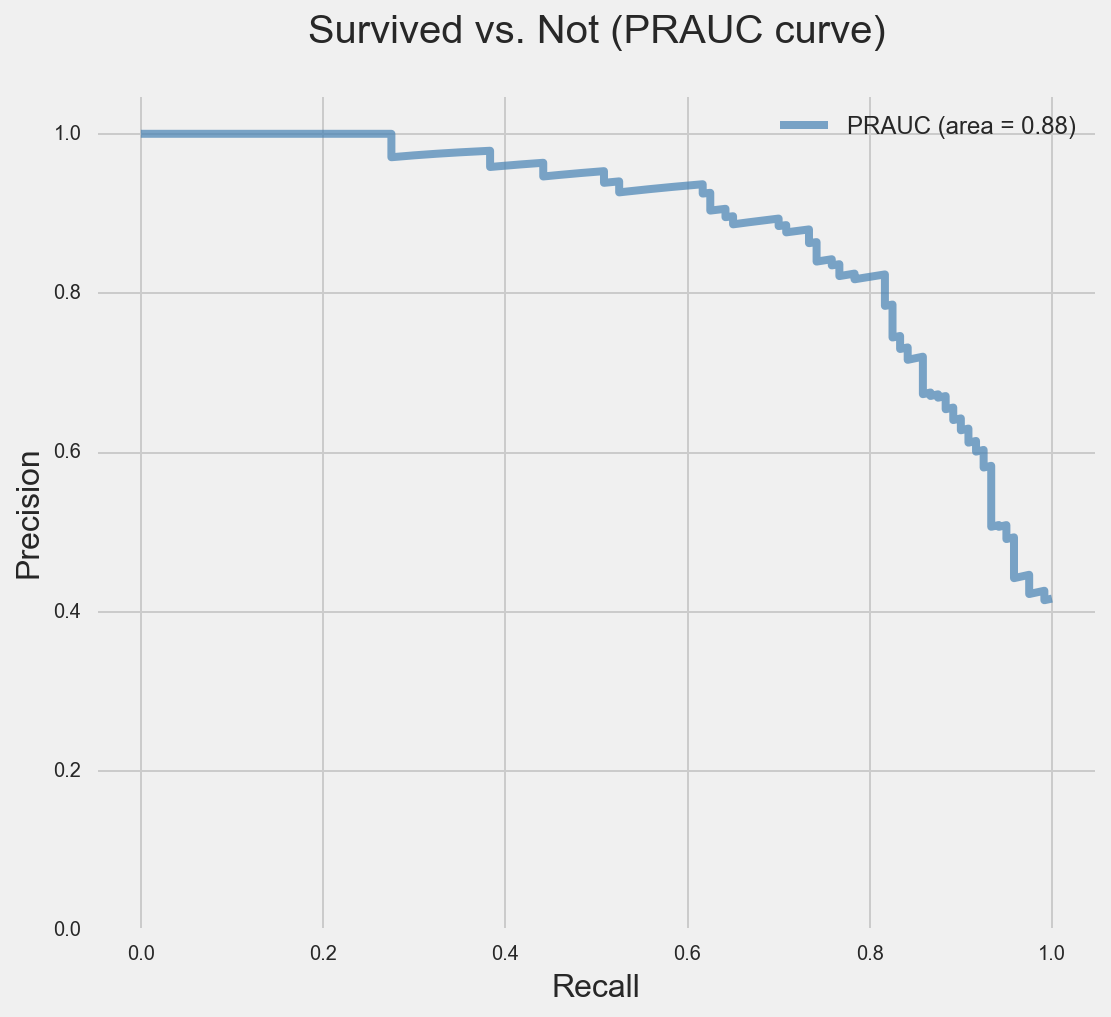

In [43]:
def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('Recall', fontsize=16)
    axr.set_ylabel('Precision', fontsize=16)
    axr.set_title(varname+' vs. Not (PRAUC curve)\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()
    
plot_prauc(gs, X_test, y_test, 'Survived')